# Calculating the trajectory of a photon around a Schwarzschild and Rotating blackhole

In [1]:
import curvedpy as cp
cp.__version__

'0.0.4a1'

In [2]:
import numpy as np
import time 
import matplotlib.pyplot as plt
from PIL import Image

## Create a BlackholeGeodesicIntegrator object that calculates geodesics for a spherically symmetric blackhole using the Schwarzschild metric

The mass is in geometrized units. A mass of 1 gives a blackhole with a Schwarzschild radius of 2. a=0 means a non-rotating blackhole.

In [3]:

gi = cp.BlackholeGeodesicIntegrator(mass = 1.0, a = 0.0, time_like = False, verbose=False)


In [4]:
print(f"Radius of the blackhole in Schwarzschild radii: {2*gi.get_m()}")

Radius of the blackhole in Schwarzschild radii: 2.0


In [5]:
def plot_sphere(r):
    theta = np.linspace(0, 2 * np.pi, 100)
    phi = np.linspace(0, np.pi, 50)
    theta, phi = np.meshgrid(theta, phi)
    
    # Convert to Cartesian coordinates
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)
    return x, y, z


## Example geodesic/trajectory of a photon that escapes

The function geodesic(k0_xyz, x0_xyz) requires two initial conditions in the for of 3-vectors in cartesian coordinates. 
* x0_xyz is the starting position of the particle. 
* k0_xyz is the starting 3-vector for the momentum (photon) or the momentum per mass (massive body).

The 4-vector initial conditions are calculated by starting at t=0 and time component of k0 is calculated using the norm of the 4-vector. This norm is zero for a photon and -1 for a massive particle.

Exec. time:  0.04099774360656738
Event of hitting the blackhole:  False


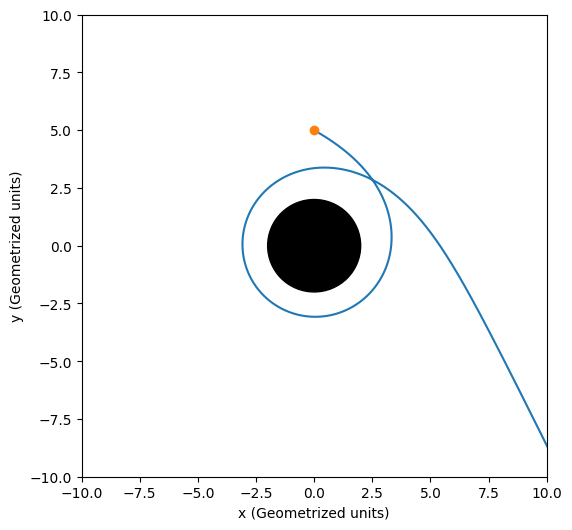

In [6]:
k0_xyz = np.array([1.0, -0.57, 0.0])
x0_xyz = np.array([0.0001, 5, 0])

st = time.time()
k_xyz, x_xyz , result = gi.geodesic(k0_xyz, x0_xyz, max_step = 1.0, curve_end=50, nr_points_curve=10000)
print("Exec. time: ", time.time()-st)
print("Event of hitting the blackhole: ", result["hit_blackhole"])

circle1 = plt.Circle((0, 0), 2, color='k')
fig, ax = plt.subplots(figsize=(6,6))
ax.add_patch(circle1)
ax.plot(*x_xyz[0:2])
ax.plot(*x0_xyz[0:2], "o")

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x (Geometrized units)")
plt.ylabel("y (Geometrized units)")
plt.show()

## Example geodesic/trajectory of a photon that falls into the blackhole

Exec. time:  0.03225207328796387
Event of hitting the blackhole:  True


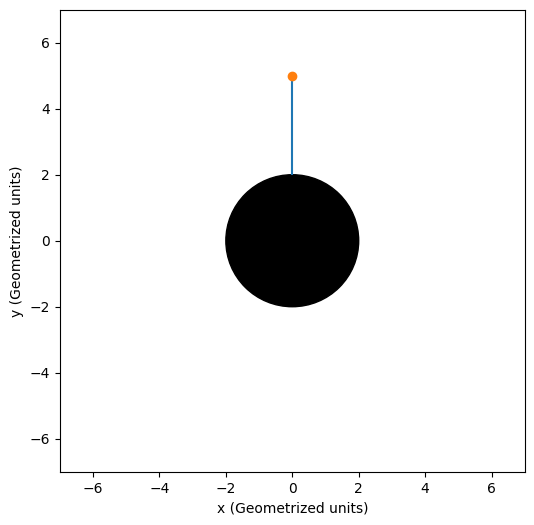

In [7]:
k0_xyz = np.array([0., -0.01, 0.0])
x0_xyz = np.array([0.0001, 5, 0])

st = time.time()
k_xyz, x_xyz , result = gi.geodesic(k0_xyz, x0_xyz,max_step = 1.0, curve_end=500, nr_points_curve=100)
print("Exec. time: ", time.time()-st)
print("Event of hitting the blackhole: ", result["hit_blackhole"])

circle1 = plt.Circle((0, 0), 2, color='k')
fig, ax = plt.subplots(figsize=(6,6))
ax.add_patch(circle1)
ax.plot(*x_xyz[0:2])
ax.plot(*x0_xyz[0:2], "o")

plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.xlabel("x (Geometrized units)")
plt.ylabel("y (Geometrized units)")
plt.show()

## Multiple photons starting at x=-10 and moving to the right

Calculation time: 0.0753 sec
Time per photon: 0.0036 sec


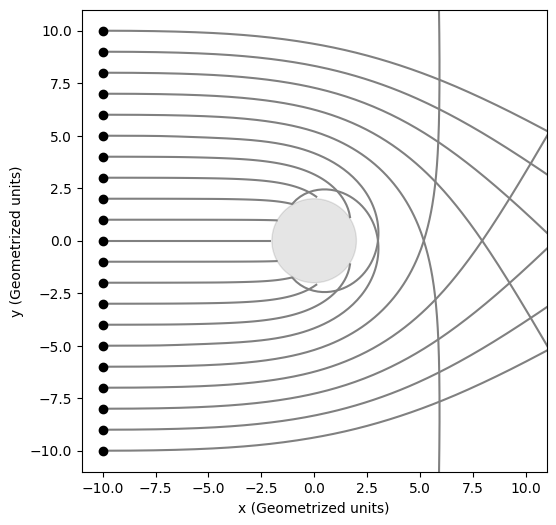

In [8]:
circle1 = plt.Circle((0, 0), 2, color='k', alpha=0.1)
fig, ax = plt.subplots(figsize=(6,6))
ax.add_patch(circle1)

nr = 21
# NEED TO FIX THE SINGULAR MATRIX PROBLEM WHEN RAY DIRECTED AT CENTER BH!!!!
x0 = [np.array([-10.0, 0.0001+10-i, 0.0]) for i in range(nr)]
k0 = [np.array([0.1, 0.0, 0.0]) for i in range(nr)]
_ = time.time()
results = gi.geodesic(\
                        k0_xyz = k0, \
                        x0_xyz = x0, \
                        curve_end=500, nr_points_curve=500)
calc_time = time.time()-_

print(f"Calculation time: {round(calc_time, 4)} sec")
print(f"Time per photon: {round(calc_time/len(x0), 4)} sec")

for k_xyz, x_xyz , res in results:
    ax.plot(*x_xyz[0:2], "gray")
    ax.plot(x_xyz[0][0], x_xyz[1][0], "ko")
    #ax.plot(*x0[0:2], "o")
    

lim = 11
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.xlabel("x (Geometrized units)")
plt.ylabel("y (Geometrized units)")
plt.show()

## Rotating blackhole using KerrSchild coordinates (version >=0.0.4)

Text(0, 0.5, 'y (Geometrized units)')

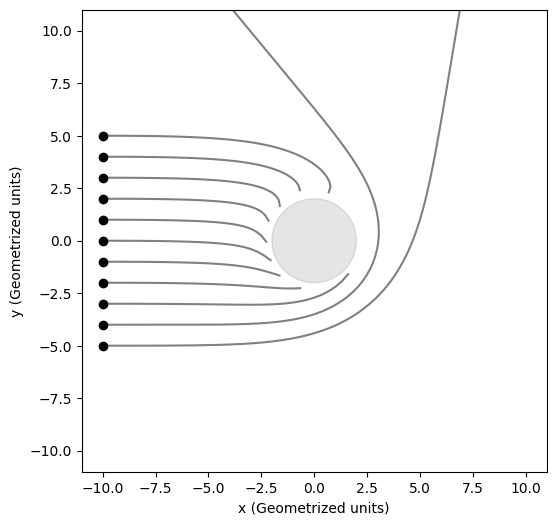

In [9]:
gi_KS = cp.BlackholeGeodesicIntegrator(mass=1, a=0.95)

y0_l = [5. - i for i in [0.,1.,2.,3.,4.,5.0000001,6.,7.,8.,9.,10.]]
circle1 = plt.Circle((0, 0), 2, color='k', alpha=0.1)
fig, ax = plt.subplots(figsize=(6,6))
ax.add_patch(circle1)

for y0 in y0_l:  
    k, x, res = gi_KS.geodesic(np.array([1, 0, 0]), np.array([-10, y0, 0]), max_step=0.1, nr_points_curve=250,)
    plt.plot(x[0], x[1], "gray")
    plt.plot(-10, y0, "ko")

plt.xlim(-11, 11)
plt.ylim(-11, 11)
plt.xlabel("x (Geometrized units)")
plt.ylabel("y (Geometrized units)")

## Using the RelativisticCamera object

In [10]:
#help(cp.RelativisticCamera)

### Creating the camera

In [11]:
cam = cp.RelativisticCamera(M=0.5,\
                         resolution=[124,124],\
                         camera_location=np.array([30,0.000001,0]), \
                         camera_rotation_euler_props=['yx',[90, 90]], \
                         force_no_sampling=True,\
                         verbose_init=False, verbose=False)

### Checking its orientation

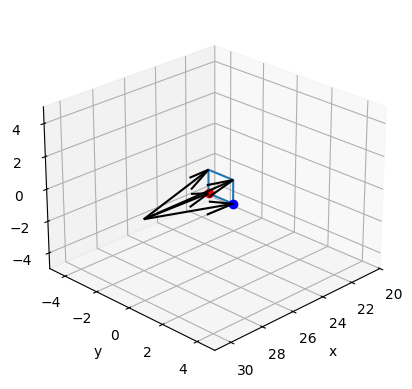

In [12]:
camera_location, corner_points, corner_rays = cam.get_camera_vis_properties()
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=25, azim=45, roll=0)
lim = 5
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_zlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_xlim(cam.camera_location[0]-10, cam.camera_location[0]+1) #(20,31)

for c in corner_rays:
    ax.quiver(*camera_location, *c, color="k")
ax.plot(*list(zip(*corner_points)))
ax.plot(*corner_points[0], "ro") # Lower left camera point (y, x = 0 in image coordinates)
ax.plot(*corner_points[1], "bo") # Lower right camera point

### Shooting rays from the camera

In [ ]:
nr_cores = 4
_ = time.time()
cam.run_mp(cores = nr_cores)
cam_time = time.time()-_
print(f"Total time using {nr_cores} cores: {round(cam_time,4)}")

### Showing all the rays for the construction of the image

In [14]:
print(f"Number of rays: {len(cam.geodesics)}")

Number of rays: 15376


In [15]:
print(f"Time per photon per core: {round(cam_time*nr_cores/256,4)} sec")

Time per photon per core: 0.522 sec


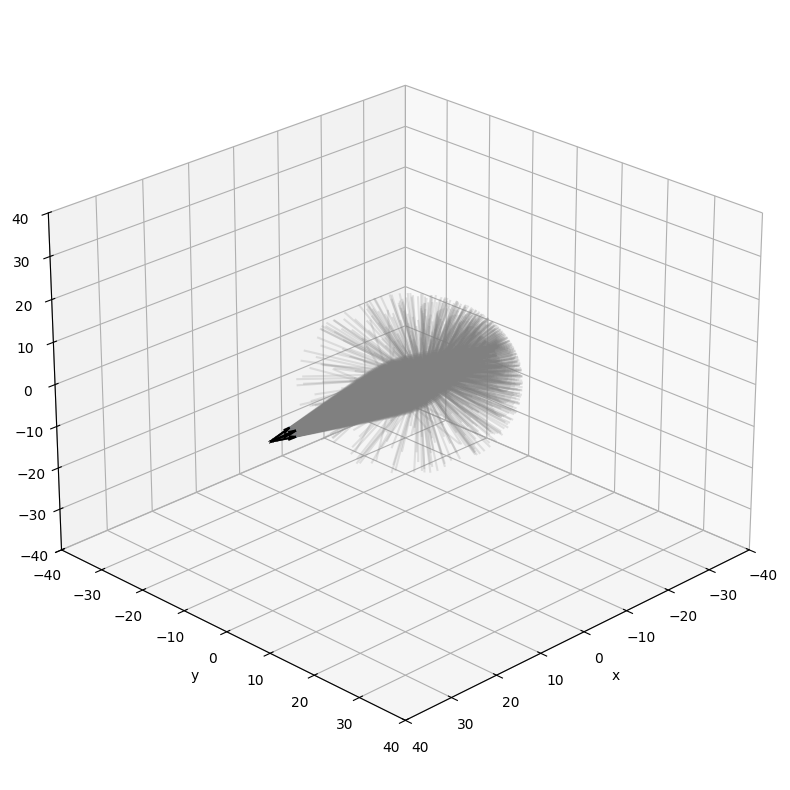

In [16]:
camera_location, corner_points, corner_rays = cam.get_camera_vis_properties()
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.view_init(elev=25, azim=45, roll=0)
lim = 40
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_ylim(-lim,lim)
ax.set_zlim(-lim,lim)
ax.set_xlim(-lim,lim)#(20,31)

for c in corner_rays:
    ax.quiver(*camera_location, *c, color="k")
ax.plot(*list(zip(*corner_points)))

for i, g in enumerate(cam.geodesics):
    if i%10==0:
        k, x = g
        ax.plot(*x,"gray", alpha=0.2)



### Image of which rays hit the blackhole horizon

Here we show which rays hit the blackhole (yellow) and which do not. You see this in camera (pixel) coordinates. Note this is a rotating blackhole and the shadow of the hole is not symmetric because of this. 

In [17]:
cam.ray_blackhole_hit.shape

(124, 124, 1)

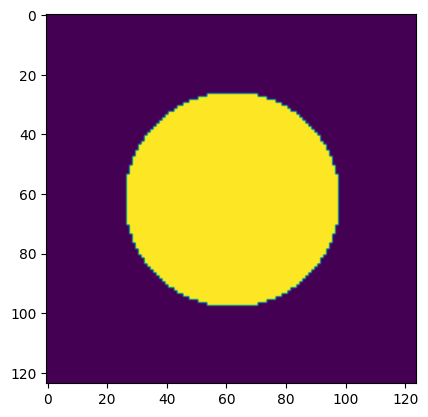

In [18]:
plt.imshow(cam.ray_blackhole_hit)

### A simple skydome projection

I added a simple projection of a skydome background image to the camera using the calculated geodesics. You can use this to quickly get an image with distorted background.

In [19]:
#help(cp.projection)

Lets use the following test image as background

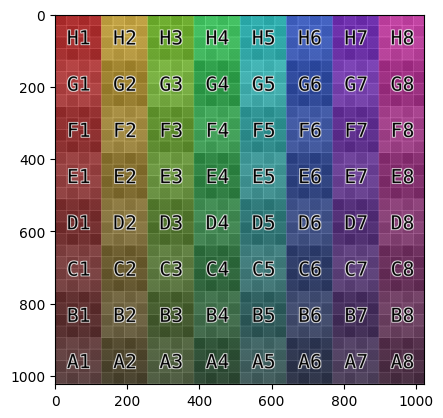

In [20]:
plt.imshow(Image.open("test.png"))

Our black hole camera makes this from it:

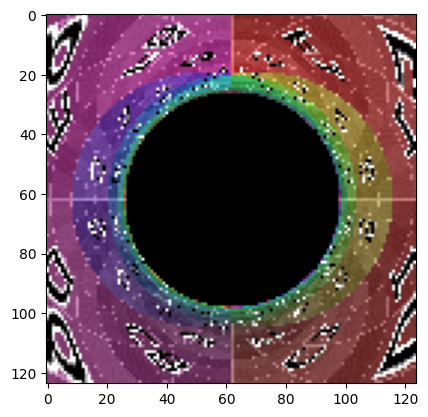

In [21]:
img = cp.projection("test.png", cam)
plt.imshow(img)

### Rendering in Blender of a 1024x1024 image

When you run a 1024x1024 camera of a rotating (a=0.49999999999, m=0.5) blackhole and use the renderer in Blender to make an image of a starry background, this is what it looks like. You use the function *cam.save(fname, directory)* to save a pkl file to load into the Blender render engine. If you want help with a filename you can use a horrible suggestion via *cam.filename_suggestion()*.

Note in the image that the blackhole does not seem to be in the center of the image. But the camera is aimed at the center of the blackhole! Remember that the blackhole rotates and does not look spherically symmetric. Cool 🤓🙀😎

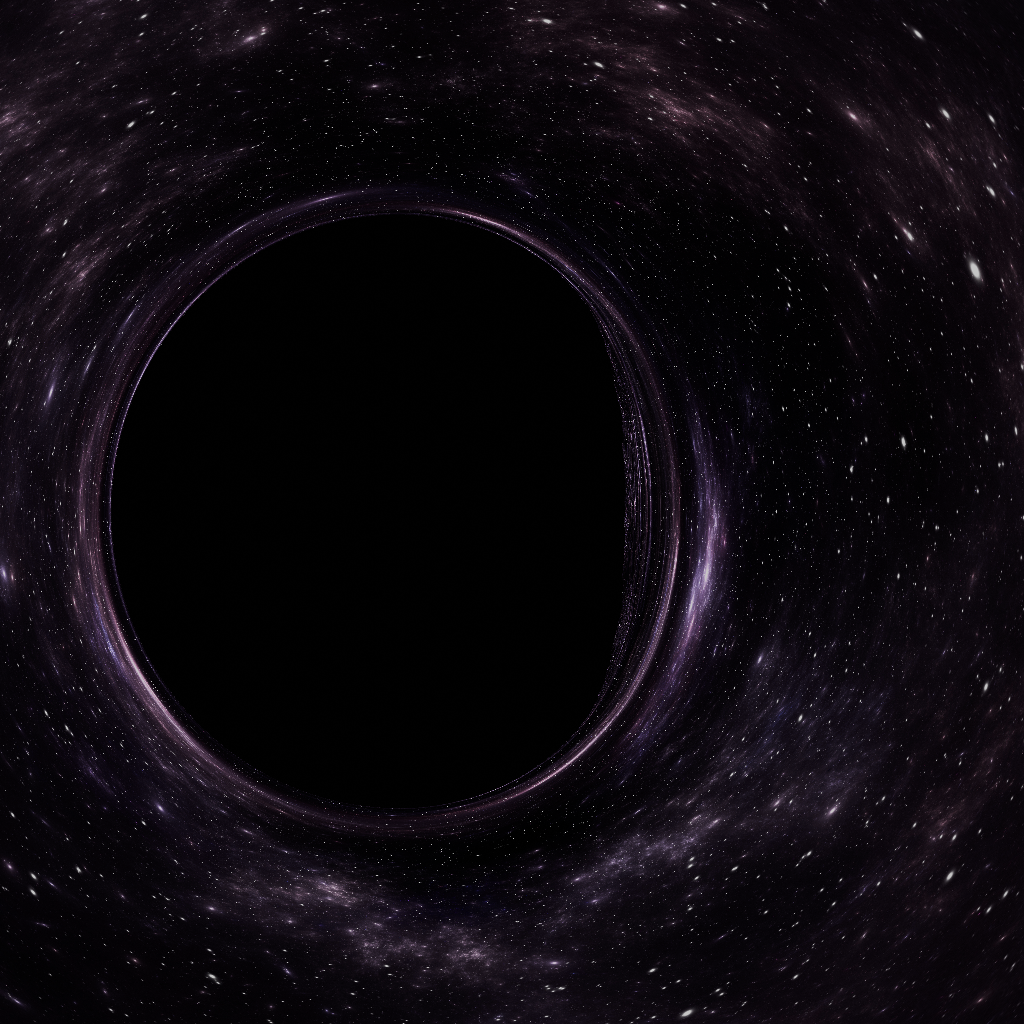

In [22]:
pil_im = Image.open("1024_a0.49999999999.png")
display(pil_im)